# Capstone Project - The Battle of the Neighborhoods (Week 4)
### Applied Data Science Capstone by IBM/Coursera 

## Author: Favio Peñaloza

# Table of contents
* [Introduction: Business Problem](#Introduction)
* [Data Section](#Data)
* [Methodology Section](#Methodology)
* [Analysis Section](#Analysis)
* [Results and Discussion Section](#Results)
* [Conclusion Section](#Conclusion)

# Introduction: Business Problem <a name="Introduction"></a>
My project is about “RETAIL Inc.” a department store (B2C Store) from the city of Toronto, which
seeks to create a new Physical Store.
But the question for the directive board is:
Where it would be the best place to place the new Physical Store?

And there are several key points to analyses and take the decision:
* Is important to be in a neighborhood with several points of attractions nearby.
* another key point is that they should be near to the customers that already purchase on the online store, in order to offer a Fulfilment Centre near to the customers.
* And the last point of this evaluation is the crime rates over the zone, is important to be in a relatively safe place.

These points are what makes “RETAIL Inc.” ask for help to the data science department.

In order to solve this puzzle...

RETAIL Inc. first needs to answer the following questions

1. What are the top 5 of neighbourhoods with the most points of attractions nearby?
2. What are my most common destination neighbourhoods for my delivery to home orders?
3. What are the most dangerous neighbourhoods in the city?

Once that we have an answer to those questions, we can answer the **main question**:

### Where it would be the best place to place our new Physical Store?

# Data Section <a name="Data"></a>

**RETAIL Inc.** has the questions next questions:

1. What are the top 5  neighbourhoods with the most points of attractions nearby?
2. What are my most common destination neighbourhoods for my delivery to home orders?
3. What are the most dangerous neighbourhoods in the city?

For each question, it will be necessary the followings data repositories.

#### Question 1:
We will be using the foursquare's API for the creation of a data set for each neighbourhood in the city of Toronto with their corresponding POI (Points Of Interest).

#### Question 2:
Using a data extraction tool, a CSV file was created from previous orders.
These orders will be a data set that will allow mapping a heat map for the city of Toronto in which shows the most common destinations for delivery home orders.

#### Question 3 :
Using data from "Toronto Police Service Public Safety Data Portal" we can create an analyse a data set from Crime records.


After the completion of the previous questions, we can the previous data set and create a merged data set for answering the **main question**.

### Where it would be the best place to place our new Physical Store?

# Methodology section <a name="Methodology"></a>

For each question, it would be necessary to perform:
Preprocessing stage (Understanding and Preparation)
Processing stage (Modeling and Evaluation)

And then for the final question, the following steps will be executed.

1. **Merge and Discard the unnecessary data:** because of the previous questions had different scopes and objectives, some data may not be needed, and some data needs to be merged.
2. **Data normalization:** Each question before it will have different scales and values, so is necessary first to normalize the data in order to proceed.
3. **Processing and feeding of the Model:** after all data is normalized, we need to train, feed, and execute our model in order to evaluate the accuracy of it.


# Analysis Section <a name="Analysis"></a>

**DIVIDE AND RULE** (Latin: divide et impera), or **DIVIDE AND CONQUER**, in politics and sociology is gaining and maintaining power by breaking up larger concentrations of power into pieces that individually have less power than the one implementing the strategy.
But in what we are trying to do , it means that we can decompose a big problem in small problems, that we can solve one by one.

#### Libraries and objects imports for the entire project

In [1]:
import numpy as np  # useful for many scientific computing in Python
import numpy as y_pos 

import pandas as pd # library for data analsysis


import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes
import folium

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.21.0               |             py_0          58 KB  conda-forge
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.2 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.21.0-py_0

The following packages will be UPDATED:

  openssl                                 1.1.1f-h516909a_0 --> 1.1.1g-h516909a_0



openssl-1.1.1g       | 2.1 MB    | ############

In [2]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

#### Set project Variables 

In [3]:
CLIENT_ID='Q23QK5D4YIGES1W1L0WIO5QKFU5FWWGDFFP0HOSZA2SKZ150'

CLIENT_SECRET='Q3IQQQRLDPWLMFEL2LIDC5YKR5VCKTO0IN5WGBKDCNVMO3DE'
VERSION = '20180605'

radius = 1000 # define radius
LIMIT = 300 # limit of number of venues returned by Foursquare API


# create latitude and longitude for Toronto

address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude= location.longitude
print(longitude,latitude)

-79.3839347 43.6534817


#### Gathering all CSV data sources
* Neighbourhood_Crime_Rates_Boundary_File
* canada_zip_codes
* neighbourhood_profiles
* neighbourhoods
* canada_zip_codes

In [4]:
Neighbourhood_Crime_Rates_Boundary_File = pd.read_csv('https://raw.githubusercontent.com/penalozafavio/Applied-Data-Science-Capstone/master/week%204%20-%205/Data%20Section/CSV/Neighbourhood_Crime_Rates_Boundary_File_.csv')

canada_zip_codes = pd.read_csv('https://raw.githubusercontent.com/penalozafavio/Applied-Data-Science-Capstone/master/week%204%20-%205/Data%20Section/CSV/street%20with%20postal%20code.csv')

neighbourhood_profiles= pd.read_csv('https://raw.githubusercontent.com/penalozafavio/Applied-Data-Science-Capstone/master/week%204%20-%205/Data%20Section/CSV/Neighbourhood_Crime_Rates_Boundary_File_.csv')

neighbourhoods=pd.read_csv('https://raw.githubusercontent.com/penalozafavio/Applied-Data-Science-Capstone/master/week%204%20-%205/Data%20Section/CSV/Neighbourhoods.csv')

canada_zip_codes = pd.read_csv('https://raw.githubusercontent.com/penalozafavio/Applied-Data-Science-Capstone/master/week%204%20-%205/Data%20Section/CSV/street%20with%20postal%20code.csv')


#### Gathering all DB data sources

* df_orders_reatil

In [5]:
import ibm_db
import ibm_db_dbi

dsn = "DRIVER={{IBM DB2 ODBC DRIVER}};" + \
      "DATABASE=BLUDB;" + \
      "HOSTNAME=dashdb-txn-sbox-yp-dal09-08.services.dal.bluemix.net;" + \
      "PORT=50000;" + \
      "PROTOCOL=TCPIP;" + \
      "UID=xwk56591;" + \
      "PWD=53dqsn1t1rj8r@42;"

hdbc  = ibm_db.connect(dsn, "", "")

hdbi = ibm_db_dbi.Connection(hdbc)
sql = 'SELECT * FROM orders'

df_orders_reatil = pd.read_sql(sql,hdbi)



## Foursquares Functions

#### getNearbyVenues(names, latitudes, longitudes, radius):

In [6]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    venues_list=[]
    nearby_venues=pd.DataFrame()
    for name, lat, lng in zip(names, latitudes, longitudes):    
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        reponse=requests.get(url).json()
        errorCode=reponse["meta"]['code']
        if errorCode != 200:
           print('error',reponse["meta"]['errorDetail'])
           return(nearby_venues)
        results = reponse["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

## Question 1:
We will be using the foursquare's API for the creation of a data set for each neighbourhood in the city of Toronto with their corresponding POI (Points Of Interest).

In [7]:
toronto_venues = getNearbyVenues(names=neighbourhoods['AREA_NAME'],latitudes=neighbourhoods['LATITUDE'],longitudes=neighbourhoods['LONGITUDE'],radius=radius)


In [8]:
# create map of toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_venues['Venue Latitude'], toronto_venues['Venue Longitude'], toronto_venues['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [10]:
mapTorontoPOI=toronto_venues.groupby('Neighborhood').count()
mapTorontoPOImapTorontoPOI=mapTorontoPOI.drop(['Neighborhood Longitude','Neighborhood Latitude','Venue Longitude','Venue Category','Venue Latitude'], axis=1)

mapTorontoPOIMap = pd.DataFrame({'Neighborhood':mapTorontoPOI.index, 
                    'Venue':mapTorontoPOI['Venue']}) 

mapTorontoPOI = mapTorontoPOImapTorontoPOI.sort_values(["Venue"], ascending = (True))

#### Getting data from GeoJson file

In [11]:

!wget --quiet https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/toronto.geojson -O TorontoGeob.json
TO_Geo = r'TorontoGeob.json' 

In [12]:
map_toronto_c = folium.Map(location=[latitude, longitude],width='100%' ,height='100%',zoom_start=11)
map_toronto_c.choropleth(
    geo_data=TO_Geo,
    data=mapTorontoPOIMap,
    columns=['Neighborhood','Venue'],
    key_on='feature.properties.name',
    fill_color='Set3',
    line_color='black',
    fill_opacity=1, 
    line_opacity=0.4,
    legend_name='Venue rate  in Toronto'
)
map_toronto_c

#### We are going to separate the neighborhoods (Top 5) that have more attraction points ( Venue)

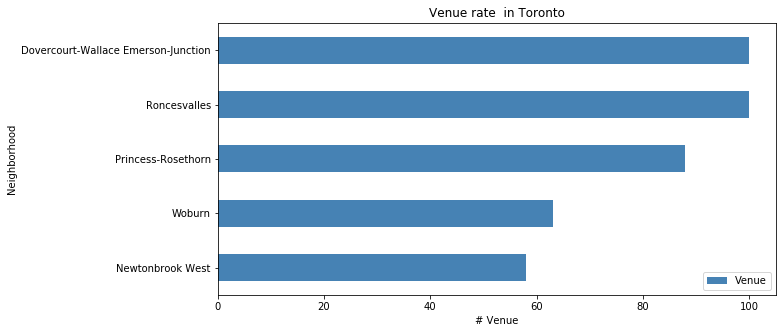

In [33]:
df_Top=mapTorontoPOI
df_Top=df_Top.sort_values(["Venue"], ascending = (False))
df_Top=df_Top.head()
df_Top=df_Top.sort_values(["Venue"], ascending = (True))
df_Top.plot(kind='barh', figsize=(10, 5), color='steelblue')
plt.xlabel('# Venue')
plt.title('Venue rate  in Toronto')
plt.show()

In [37]:
df_Top.reset_index()
df_Top=df_Top.rename(columns={"Venue": "Total"})
df_Top

,Neighborhood,Total
0,Newtonbrook West,58
1,Woburn,63
2,Princess-Rosethorn,88
3,Roncesvalles,100
4,Dovercourt-Wallace Emerson-Junction,100


In [38]:
#df_Top toronto_venues

df_Top=df_Top.merge(toronto_venues, left_on='Neighborhood', right_on='Neighborhood')

df_Top

,Neighborhood,Total,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Newtonbrook West,58,43.858299,-79.314215,Smash Kitchen & Bar,43.859088,-79.315106,Restaurant
1,Newtonbrook West,58,43.858299,-79.314215,Alchemy Coffee,43.860800,-79.312319,Café
2,Newtonbrook West,58,43.858299,-79.314215,Sheridan Nurseries,43.858136,-79.320942,Flower Shop
3,Newtonbrook West,58,43.858299,-79.314215,Markham Pan Am Centre,43.854841,-79.308892,Sports Club
4,Newtonbrook West,58,43.858299,-79.314215,Mr Jerk,43.860805,-79.311354,Caribbean Restaurant
...,...,...,...,...,...,...,...,...
404,Dovercourt-Wallace Emerson-Junction,100,43.656769,-79.385407,Sushi Box,43.662960,-79.386580,Sushi Restaurant
405,Dovercourt-Wallace Emerson-Junction,100,43.656769,-79.385407,401 Games,43.663623,-79.384037,Hobby Shop
406,Dovercourt-Wallace Emerson-Junction,100,43.656769,-79.385407,Queen's Park,43.663946,-79.392180,Park
407,Dovercourt-Wallace Emerson-Junction,100,43.656769,-79.385407,Toronto PATH System,43.649903,-79.383053,General Travel


In [40]:

# one hot encoding
canada_onehot = pd.get_dummies(df_Top[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
canada_onehot['Neighborhood'] = df_Top['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [canada_onehot.columns[-1]] + list(canada_onehot.columns[:-1])
canada_onehot = canada_onehot[fixed_columns]
canada_grouped = canada_onehot.groupby('Neighborhood').mean().reset_index()
canada_grouped.head()

,Neighborhood,Yoga Studio,American Restaurant,Antique Shop,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Dealership,Automotive Shop,Bakery,Bank,Bar,Beach Bar,Beer Bar,Beer Store,Bookstore,Boutique,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,...,Smoke Shop,Snack Place,Soup Place,Souvlaki Shop,Spa,Speakeasy,Sporting Goods Shop,Sports Club,Sri Lankan Restaurant,Steakhouse,Supermarket,Sushi Restaurant,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Tibetan Restaurant,Toy / Game Store,University,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint
0,Dovercourt-Wallace Emerson-Junction,0.020000,0.010000,0.000000,0.01,0.01,0.020000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.010000,0.00,0.000000,0.000000,0.010000,0.00,0.020000,0.000000,0.010000,0.010000,0.020000,0.000000,...,0.01,0.000000,0.000000,0.01,0.00,0.01,0.000000,0.000000,0.000000,0.01,0.010000,0.03,0.010000,0.010000,0.02,0.000000,0.00,0.000000,0.01,0.020000,0.000000,0.000000,0.00,0.000000,0.000000
1,Newtonbrook West,0.017241,0.000000,0.000000,0.00,0.00,0.017241,0.000000,0.00,0.017241,0.017241,0.034483,0.034483,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.017241,0.000000,0.051724,0.017241,0.000000,0.000000,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.017241,0.017241,0.000000,0.00,0.017241,0.00,0.017241,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.017241,0.017241,0.017241,0.00,0.000000,0.000000
2,Princess-Rosethorn,0.000000,0.000000,0.011364,0.00,0.00,0.000000,0.011364,0.00,0.000000,0.000000,0.056818,0.011364,0.068182,0.00,0.011364,0.022727,0.000000,0.00,0.000000,0.022727,0.000000,0.000000,0.000000,0.011364,...,0.00,0.011364,0.011364,0.00,0.00,0.00,0.000000,0.000000,0.000000,0.00,0.011364,0.00,0.000000,0.011364,0.00,0.011364,0.00,0.011364,0.00,0.000000,0.000000,0.011364,0.00,0.011364,0.000000
3,Roncesvalles,0.010000,0.000000,0.000000,0.00,0.00,0.020000,0.020000,0.01,0.000000,0.000000,0.020000,0.000000,0.080000,0.01,0.010000,0.010000,0.000000,0.01,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.010000,0.00,0.01,0.00,0.000000,0.000000,0.000000,0.00,0.010000,0.00,0.010000,0.010000,0.02,0.020000,0.01,0.000000,0.00,0.040000,0.000000,0.020000,0.02,0.000000,0.000000
4,Woburn,0.000000,0.015873,0.000000,0.00,0.00,0.015873,0.000000,0.00,0.000000,0.000000,0.000000,0.031746,0.000000,0.00,0.000000,0.000000,0.031746,0.00,0.047619,0.000000,0.000000,0.000000,0.031746,0.000000,...,0.00,0.000000,0.000000,0.00,0.00,0.00,0.015873,0.000000,0.015873,0.00,0.031746,0.00,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.000000,0.015873


In [ ]:
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

## Question 2:
Using a data extraction tool, a CSV file was created from previous orders.
These orders will be a data set that will allow mapping a heat map for the city of Toronto in which shows the most common destinations for delivery home orders.

## Question 3 :
Using data from "Toronto Police Service Public Safety Data Portal" we can create an analyse a data set from Crime records.

In [ ]:

!wget --quiet https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/toronto.geojson -O TorontoGeob.json
TO_Geo = r'TorontoGeob.json' 

## The One Million Question: 

### Where it would be the best place to place our new Physical Store?

# Results and Discussion section <a name="Results"></a>

# Conclusion Section <a name="Conclusion"></a>

# Thank You  - Muchas Gracias - Muito Obrigado